# Project Main Workbook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## 1) Initial Data Exploration

In [10]:
df = pd.read_csv('/Users/sindhujarai/Documents/Columbia Fall 2023/Applied Machine Learning/AML_Project/Data/Credit_card.csv')
df_label = pd.read_csv('/Users/sindhujarai/Documents/Columbia Fall 2023/Applied Machine Learning/AML_Project/Data/Credit_card_label.csv')

In [15]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [20]:
credit_df = df.merge(df_label, on = 'Ind_ID')

In [25]:
len(credit_df)

1548

In [116]:
# education_df = pd.DataFrame(credit_df.groupby(['EDUCATION']).count()).reset_index()

<b> 2 Plot charts to understand data distribution of the target variable. </b>

Application Approved:  1373  Probability:  0.887
Application Rejected:  175 Probability:  0.113


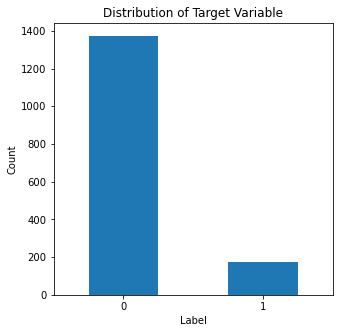

In [115]:
#TARGET VARIABLE DISTRIBUTION

label, count = np.unique(credit_df['label'], return_counts = True)
probability = count/len(credit_df)

print("Application Approved: ", count[0], " Probability: ", probability[0].round(3))
print("Application Rejected: ", count[1], "Probability: ", probability[1].round(3))

plt.figure(figsize = (5, 5))
credit_df['label'].value_counts().plot(kind = 'bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.xticks(rotation = '0')
plt.show()

# 0 -> Approved
# 1 -> Rejected

<b> 3 Plot correlation / stacked bar charts to understand the relationship between each variable and the target variable </b>

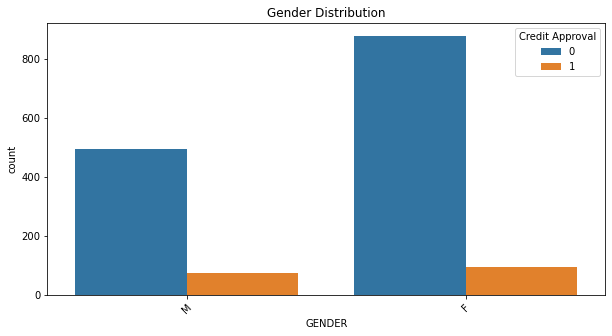

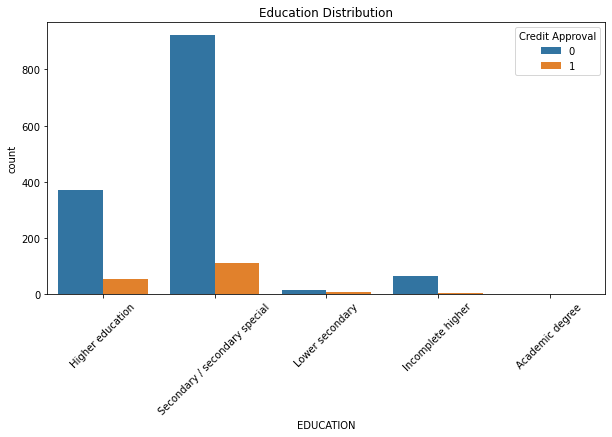

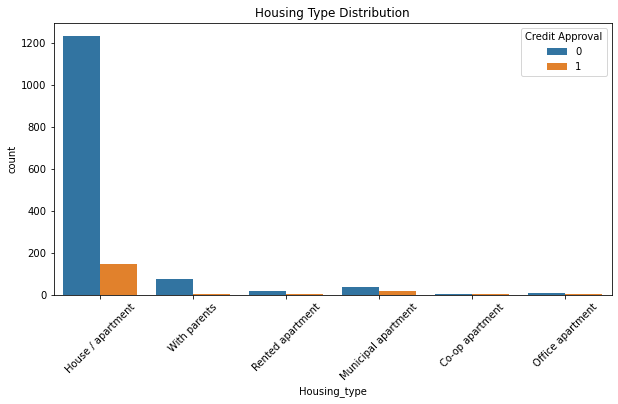

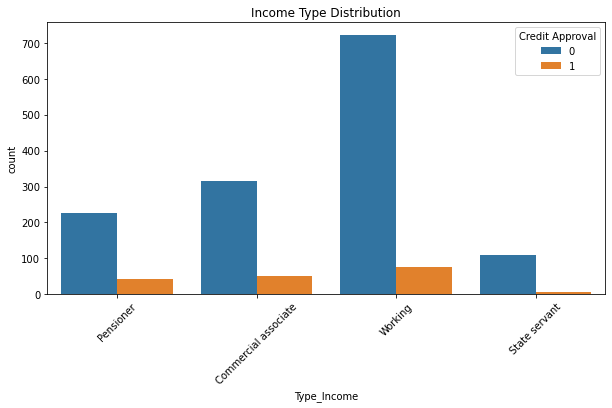

In [105]:
#Distribution of Categorical Variables wrt Target Variable

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'GENDER', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Gender Distribution")
plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'EDUCATION', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Education Distribution")
plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Housing_type', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Housing Type Distribution")
plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Type_Income', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Income Type Distribution")
plt.xticks(rotation = '45')
plt.show()


<b> 1 Plot charts to understand data distribution of the numerical / categorical variables. </b>

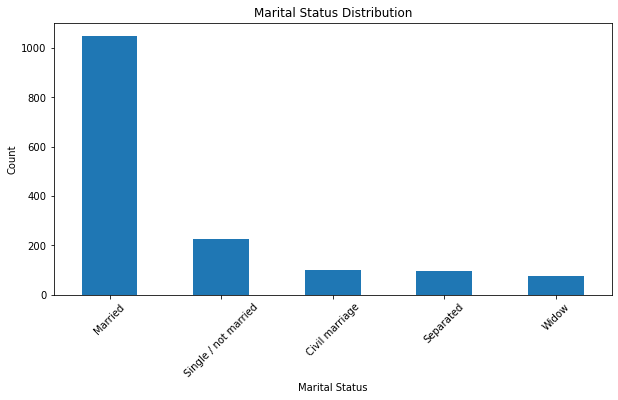

In [87]:
#Marital Status Distribution 

plt.figure(figsize = (10, 5))
credit_df['Marital_status'].value_counts().plot(kind = 'bar')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
plt.xticks(rotation = '45')
plt.show()

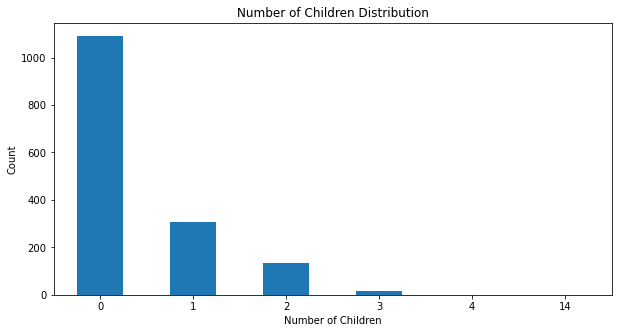

In [97]:
#Number of Children Distribution

plt.figure(figsize = (10, 5))
credit_df['CHILDREN'].value_counts().plot(kind = 'bar')
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Number of Children Distribution")
plt.xticks(rotation = '0')
plt.show()

#14 seems to be an outlier

<b> 4 Plot correlation between each of the input variables </b>

In [110]:
credit_df['Employment_Status'] = np.where(credit_df['Employed_days'] > 0 , 'Unemployed', 'Employed')
credit_df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employment_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,Unemployed
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Employed
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Employed


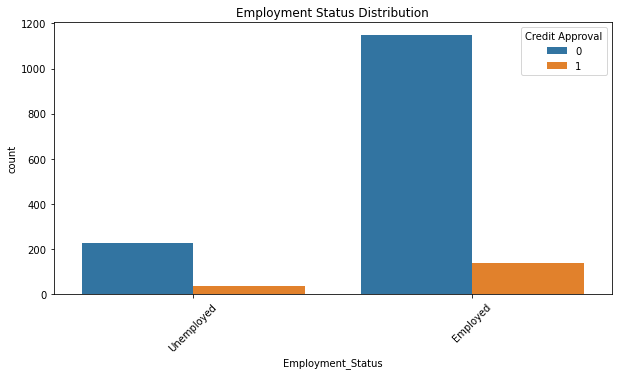

In [114]:
#Employment Status wrt Target Variable

plt.figure(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Employment_Status', hue = 'label')
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Employment Status Distribution")
plt.xticks(rotation = '45')
plt.show()

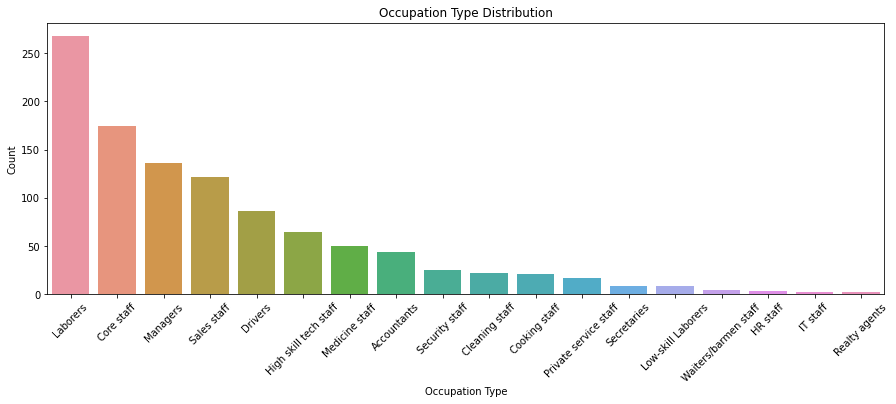

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [127]:
#Occupation Type Distribution


plt.figure(figsize = (15, 5))
sns.barplot(x = df['Type_Occupation'].value_counts().index, y = df['Type_Occupation'].value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation = 45)
plt.show()

df['Type_Occupation'].value_counts()

<b> 5 Other Ideas <b>

In [117]:
#Can plot age distribution

# 2) Cleaning and Sampling

<b> 1 Perform missing value analysis, describe how potentially to encode missing values </b>

<b> 2 Describe how to encode each of the categorical features ie) OHE, target encoding, ordinal encoding </b>

<b> 3 Describe the sampling method for the train/dev split, cross-validation etc. </b>

<b> 4 Other Ideas <b>

# 3) Insights from Data Exploration


<b> 1 Describe which features if any need to be dropped, scaled, etc. </b>

<b> 2 Describe overall findings from (1)-(2) </b>

<b> 3 Other Ideas </b>

# 4) Machine Learning Techniques Proposed to be Implemented

<b> 1 Describe the goal, and machine learning techniques that could be implemented </b>

<b> 2 Describe the performance metrics we will be evaluating </b>

<b> 3 Describe the means for doing the hyperparameter tuning, training, etc. ie) calibration, over/undersampling etc. </b>

<b> 4 Other Ideas </b>